# Classification in Python with GitHub Copilot

To run and replicate this demo, leverage Copilot's assistance by pressing the `ENTER` key after each comment, followed by `Tab` when the Copilot suggestion appears on the screen. Once the cells are complete, just run them in order.

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv"
df = pd.read_csv(url)

In [6]:
# printing the first 5 rows of the dataset

# q: what is a pandas dataframe?
# a: a pandas dataframe is a 2-dimensional labeled data structure with columns of potentially different types.
# q: more detail?
# a: you can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

# what does df.head do?
# df.head() returns the first n rows of a dataframe. By default, n is 5.
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


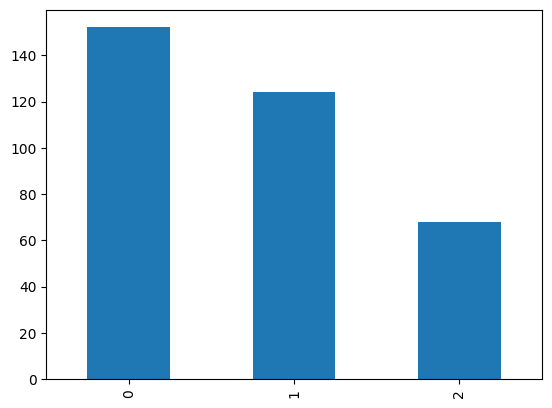

In [7]:
# Let's visualize the distribution of the penguins species with a bar plot in matplotlib

import matplotlib.pyplot as plt

df["Species"].value_counts().plot(kind="bar")
plt.show()

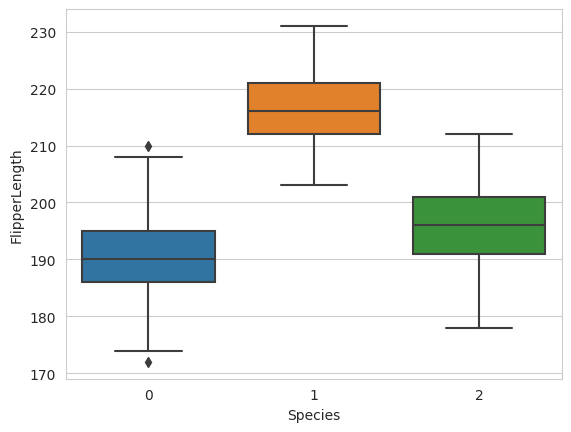

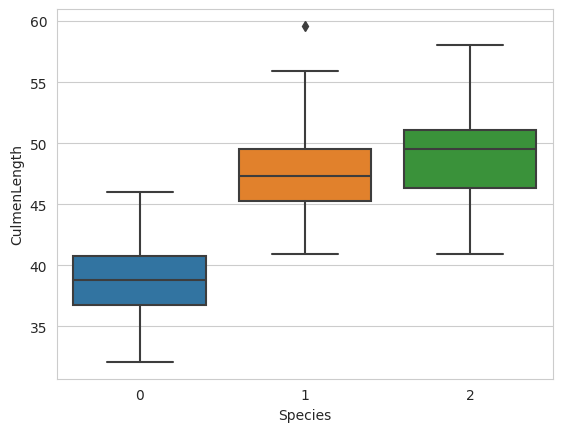

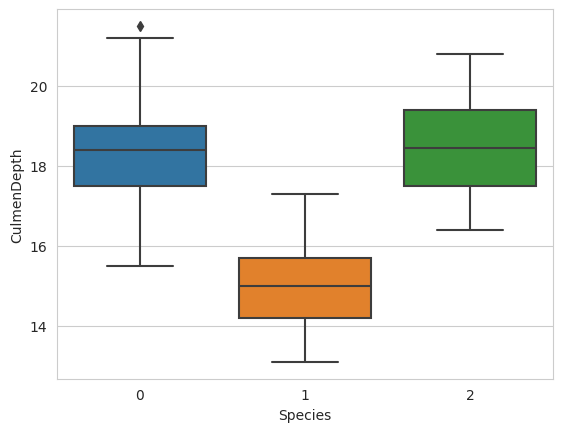

In [8]:
# Let's visualize with boxplots how the FlipperLength, CulmenLength and CulmenDepth are distributed for each species
# importing seaborn
import seaborn as sns
# setting the style of the plot
sns.set_style("whitegrid")
# creating a boxplot
sns.boxplot(x="Species", y="FlipperLength", data=df)
# showing the plot
plt.show()
# creating a boxplot for CulmenLength
sns.boxplot(x="Species", y="CulmenLength", data=df)
# showing the plot
plt.show()
# creating a boxplot for CulmenDepth
sns.boxplot(x="Species", y="CulmenDepth", data=df)
# showing the plot
plt.show()


These visualisations help us to get to know the data, including illustrating any skewing of the data, for example species 0 and 1 have more samples than species 2 and species 1 and 2 have similar ranges of Culmen Length data compared to species 0.

In [9]:
# Show rows with missing values
df[df.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [10]:
# Drop rows with missing values (as the number of missing values is small - alternatively for larger number of missing values, we can impute the missing values using the mean or median of the column)
df = df.dropna()

In [11]:
# Let's prepare for training:
# 1. Split the data into features and labels
# 2. Split the data into training and test sets

# Split the data into features and labels
# features are CulmenLength, CulmenDepth, FlipperLength
# labels are Species
features = df[['CulmenLength', 'CulmenDepth', 'FlipperLength']]
labels = df['Species']

In [51]:
# Split the data into training and test sets in a way to have 30% of the data for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

In [52]:
# Let's train a Logistic Regression model
# 1. Create a multiclass Logistic Regression model
# 2. Train the model

# Create a multiclass Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')

# Train the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [53]:
# Let's evaluate the model
# 1. Predict the labels of the test set
# 2. Calculate the accuracy of the model

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
# very good accuracy (owing to properties of the dataset and the fact that it is skewed) - not to be expected in real life

Accuracy: 99.03%
